In [1]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output

In [2]:
env = gym.make("FrozenLake-v1")

In [3]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [4]:
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
num_episodes = 10_000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

max_exploration_rate = 1
min_exploration_rate = 0.01

exploration_rate = max_exploration_rate
exploration_decay_rate = 0.001

Use Bellman equation to directly calculate the update
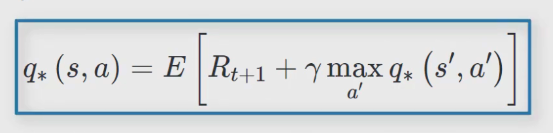
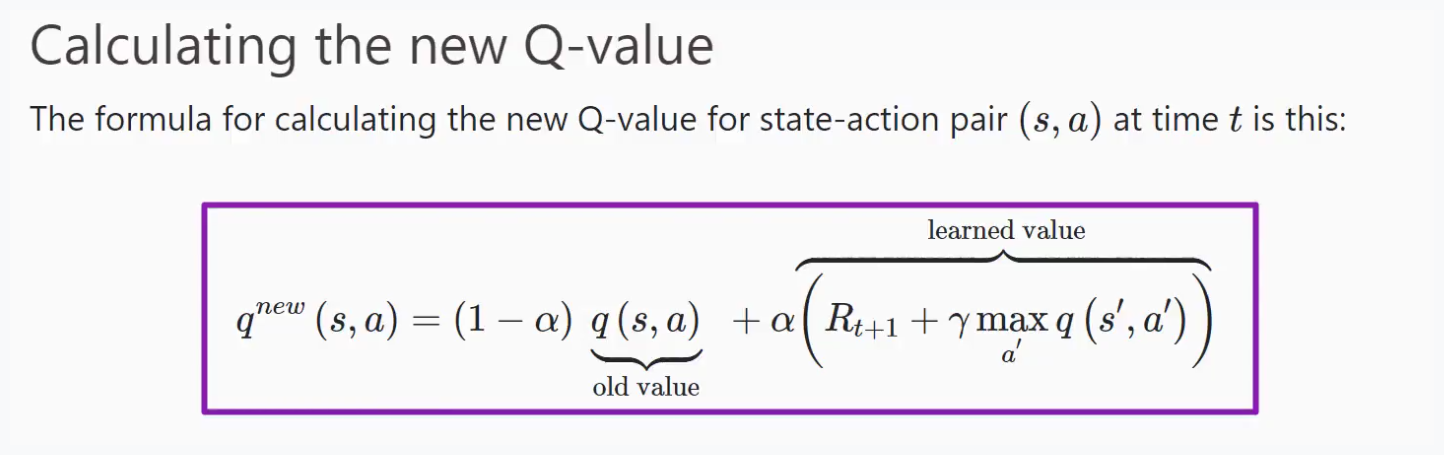

In [6]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()[0]
    is_episode_done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        # Explore or exploit
        exploration_rate_threshold = random.uniform(0, 1)

        # Exploit
        if exploration_rate_threshold > exploration_rate:
            # Highest q-value action in the current state
            action = np.argmax(q_table[state, :])
        else:
            # Explore, choose next action randomly
            action = env.action_space.sample()

        # Observation = new_state
        # is_episode_done = episode reached terminal state
        # truncated = episode ended due to time limit
        new_state, reward, is_episode_done, truncated, diagnostic_info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if is_episode_done == True or truncated == True:
            break

    # Decrease exploration probability after each episode
    # As the time goes by (number of episodes increase)
    # decay factor (np.exp(-exploration_decay_rate * episode)) decreases exponentially.
    # As the decay factor approaches zero, the overall exploration probability approaches
    # the minimum exploration probability.
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_current_episode)

In [7]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)
count = 1000
print("***** Average reward per thousand episodes *****")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

***** Average reward per thousand episodes *****
1000 :  0.05000000000000004
2000 :  0.20100000000000015
3000 :  0.45700000000000035
4000 :  0.5620000000000004
5000 :  0.6260000000000004
6000 :  0.6480000000000005
7000 :  0.6990000000000005
8000 :  0.6420000000000005
9000 :  0.7010000000000005
10000 :  0.6560000000000005


In [8]:
print("\n\n***** Q-table *****")
print(q_table)



***** Q-table *****
[[0.54994255 0.50128568 0.48258907 0.51289326]
 [0.2439108  0.22757537 0.34688209 0.51747956]
 [0.39309964 0.39631218 0.40127868 0.46643868]
 [0.27197234 0.26702638 0.24608567 0.45163574]
 [0.57098286 0.3712156  0.42727309 0.35073139]
 [0.         0.         0.         0.        ]
 [0.1564376  0.16106285 0.27435888 0.1847964 ]
 [0.         0.         0.         0.        ]
 [0.33896773 0.43898777 0.30938564 0.5938188 ]
 [0.42442464 0.63584395 0.48196555 0.44725557]
 [0.53700444 0.3979549  0.32820575 0.28755558]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.53025502 0.4120861  0.77930711 0.37857557]
 [0.70420317 0.88833714 0.77319107 0.75177864]
 [0.         0.         0.         0.        ]]


In [9]:
env.close()